In [57]:
import darp
import Visualization
import darpinPoly
import time
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from numpy import random
from interruptingcow import timeout
from scipy.ndimage import convolve

def some_function():
    timeout = time.time() + 5
    while True:
        print("yo")
        if time.time() > timeout:
            break
# import Visualization

In [19]:
# the O.S package make a directory is this a file, making a data directory
# pickle package native python object. Nice way to sve data, pickle.dump to file
# obstacle generation
# def covisiblity_calculation:

map = np.array([[1, 1, 1, 1, 0, 1, 1, 3, 3, 3],
 [1, 1, 1, 1, 0, 1, 1, 3, 3, 3],
 [1, 1, 1, 1, 0, 1, 1, 2, 2, 2],
 [1, 1, 0, 1, 0, 1, 1, 1, 2, 2],
 [1, 2, 0, 0, 0, 0, 1, 1, 2, 2],
 [1, 2, 0, 0, 0, 0, 1, 1, 2, 2],
 [1, 2, 0, 0, 1, 1, 1, 1, 1, 1],
 [1, 2, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


# Creates Binary Map Representation

obstacles = 1 #Binary indication of whether or not obstacles are present. Should be class object. 
number_of_robots = 3 # Equal to the amount of robots initialized. 
obstacle_indication = number_of_robots - obstacles + 1 # index starts at 0 for poses on map.
map_binary = np.where(map < obstacle_indication, 1, map)
map_binary = np.where(map_binary == obstacle_indication, 0, map_binary)
print("map_bianry")
print(map_binary)
print("")


# Alters Maps to be Stored

map_stored = np.where(map == obstacle_indication, -1, map) # If map has obstacles it replaces it with -1
print("\n")
print("map_stored")
print(map_stored)
print("\n")



# Creates Convolved Map

dilation_kernel = np.ones((3,3))*1/9
map_convolved = convolve(map, dilation_kernel)
edges_channel = map_convolved - map
binary_convolved = convolve(map_binary, dilation_kernel)
edges_binary = binary_convolved - map_binary
covisibility_score = abs(np.count_nonzero(edges_channel)) - abs(np.count_nonzero(edges_binary))
print("\n")
print("covisibility_score")
print(covisibility_score)
print("\n")




# Finally subtract the known number of borders surrounding the obstacles
# I think it would be for in map areas where there is a known border. We can make it smarter by running that scores
# if map has obstacles:
# perform convolution
# binary edge detection - subtract valuAA


print("\n")
print("map convolved")
print(map_convolved)







map_bianry
[[1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]



map_stored
[[ 1  1  1  1  0  1  1 -1 -1 -1]
 [ 1  1  1  1  0  1  1 -1 -1 -1]
 [ 1  1  1  1  0  1  1  2  2  2]
 [ 1  1  0  1  0  1  1  1  2  2]
 [ 1  2  0  0  0  0  1  1  2  2]
 [ 1  2  0  0  0  0  1  1  2  2]
 [ 1  2  0  0  1  1  1  1  1  1]
 [ 1  2  0  0  0  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1  1  1  1  1  1  1  1  1  1]]




covisibility_score
28




map convolved
[[1 1 1 0 0 0 1 2 3 3]
 [1 1 1 0 0 0 1 2 2 2]
 [1 0 0 0 0 0 1 1 2 2]
 [1 0 0 0 0 0 1 1 1 2]
 [1 0 0 0 0 0 0 1 1 2]
 [1 0 0 0 0 0 0 1 1 1]
 [1 0 0 0 0 0 0 1 1 1]
 [1 1 0 0 0 0 1 1 1 1]
 [1 1 0 0 0 0 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [13]:
# Circle Gradient

# returns map that is circulized but also positions that need to be counted as an obstacle
# Circle Gradient
# returns map that is circulized but also positions that need to be counted as an obstacle
# def create_circular_mask(h, w, center=None, radius=None): 
# Outputs the map positions that are filled
# Randomly select radius before hand [3,4,5,6,7,8]
# Random Point 2 within inner radius

# Pickle Data


# Should it be 

def seed_positions(nrobots, obstacle_list, map):
    
    length = np.size(map)
    open_spots = np.arange(0, length, 1)
    open_spots = np.delete(open_spots, obstacle_list)
    seeds = rnd.sample(list(open_spots), nrobots)
    
    return seeds

def random_seed():

    #r = rnd.Random(500)
    # np.random.seed(r)
    # Map Shape or shoild w go with limited set
    
    radius_set = [3,4,5,6,7,8]
    #r.choice(radius_set)
    radius = rnd.choice(radius_set)

    return radius

def paint_map (map_im):
    
    
    plt.imshow(map_im)
    plt.show()

def openspots(map):
    w,h = map.shape
    pose = 0
    open_pose = []
    for i in range (w):
        for j in range (h):            
            index = map[i][j]
            if (index != -1):
                open_pose.append(pose)
            pose = pose + 1
    return open_pose

def filledspots(map):
    w,h = map.shape
    pose = 0
    filled_pose = []
    for i in range (w):
        for j in range (h):            
            index = map[i][j]
            if (index == -1):
                filled_pose.append(pose)
            pose = pose + 1
            
    return filled_pose


# Write in positions
def list_To_coords(coords, cols):
    cartesian = list(coords)
    cc_list = []
    print(cartesian)
    for position in cartesian:
        cc_list.append((position // cols, position % cols))
    return cc_list

def writespots(list, map, value):    
    
    w,h = map.shape
    binary_map = map
    for i in list:      
        index = np.unravel_index(i, (w,h), 'C')
        binary_map[index] = value
               
    return binary_map


def create_mask(h, w, center=None, radius=None):
    
    map = np.zeros((10,10))
    obstacle_map = np.zeros((10,10))

    # if((h*w)%2) == 0: # Run once where the center is the 4 and the other where it is the five. 
    if center is None: # use the middle of the image
        center = (float(w-1/2), float(h-1/2))
    if radius is None: # use the smallest distance between the center and image walls
        radius = min(center[0], center[1], w-center[0], h-center[1])     
        
    Y, X = np.ogrid[:h, :w]
    
    dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2) # change the sqrt to 4.5
    mask = dist_from_center <= radius
    obstacle_mask = dist_from_center <= (radius-1) # Smaller Radius to ensure that the obstacles not on edges

    circular = np.where(mask == False, -1, map)
    obstacle_map = np.where(mask == False, -1, obstacle_map)
    mask_list = filledspots(circular)

    
    # gets all poses that are open. 
    # random select two poses from openspots
    # random_obstacles = random.sample(openspots(obstacle_map), 2)
    # append the two list together
    random_obstacles = rnd.sample(openspots(obstacle_map), 2)    
    map_list = mask_list #+ random_obstacles
    obstacle_list = mask_list + random_obstacles
    
    return circular, map_list, random_obstacles, obstacle_list



    

    


#print("\n)")
#print(random_obstacles)
#print("\n)")
#print(map_list)
#print("\n)")
#print(obstacle_list)
# mask = create_circular_mask(10,10, center, 3)
# circular = np.where(mask == False, -1, map)
#print("\n")
#print(mask)
#print("\n")
#print(circular)

### https://newbedev.com/how-can-i-create-a-circular-mask-for-a-numpy-array

Basically you need and can try to make a larger bound for radius width. 

[58, 62, 33]
[7, 66]
[58, 62, 33]
Given Grid area:
[[0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 2 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Final Assignment Matrix:
[[0. 0. 0. 0. 0. 0. 0. 3. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [2. 2. 0. 0. 0. 0. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 0. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 3. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 1. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 2. 1. 1. 1.]]

Results:

0 
Turns: [34, 24, 26]
Average: 28.000
Standard Deviation: 4.320

1 
Turns: [28, 26, 30]
Average: 28.000
Standard Deviation: 1.633

2 
Turns: [24, 40, 30]
Average: 31.333
Standard Deviation: 6.600

3 
Turns: [24, 50, 24]
Average: 32.667
Standard Deviation: 12.257



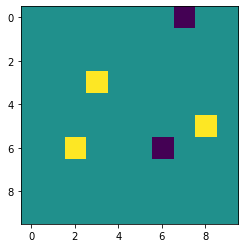

[99, 53, 95]
[90, 78]
[99, 53, 95]
Given Grid area:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 2 0 0 0 2]]
[56, 52, 46]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 27, 28, 29, 30, 31, 38, 39, 40, 41, 48, 49, 50, 51, 58, 59, 60, 61, 68, 69, 70, 71, 72, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 67, 35]
[56, 52, 46]
Given Grid area:
[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 1 1 1]
 [1 1 0 0 0 1 0 0 1 1]
 [1 1 0 0 0 0 2 0 1 1]
 [1 1 2 0 0 0 2 0 1 1]
 [1 1 0 0 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]

Final Assignment Matrix:
[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 3. 3. 1. 0. 0. 0. 3. 3. 3.]
 [3. 3. 1. 1. 0. 3. 0. 0. 3. 3.]
 [3. 3. 1. 1. 

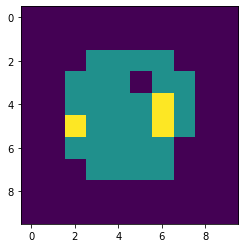

[36, 44, 38]
[18, 54]
[36, 44, 38]
Given Grid area:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 2 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

Final Assignment Matrix:
[[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 3. 1.]
 [0. 2. 2. 2. 0. 0. 0. 1. 1. 1.]
 [2. 2. 2. 2. 2. 0. 0. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 0. 1. 1. 1.]
 [2. 2. 2. 2. 3. 2. 0. 1. 1. 1.]
 [2. 2. 2. 2. 2. 2. 0. 1. 1. 1.]
 [2. 2. 2. 2. 2. 0. 0. 1. 1. 1.]
 [0. 2. 2. 2. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]]

Results:

0 
Turns: [47, 20, 32]
Average: 33.000
Standard Deviation: 11.045

1 
Turns: [40, 22, 32]
Average: 31.333
Standard Deviation: 7.364

2 
Turns: [31, 38, 37]
Average: 35.333
Standard Deviation: 3.091

3 
Turns: [36, 42, 34]
Average: 37.333
Standard Deviation: 3.399



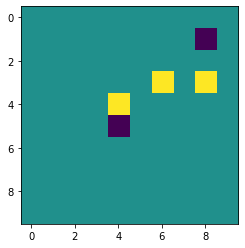

[7, 88, 44]
[15, 12]
[7, 88, 44]
Given Grid area:
[[0 0 0 0 0 0 0 2 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0]]

Final Assignment Matrix:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 3. 0. 0. 3. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 2. 2. 2.]
 [1. 1. 1. 1. 1. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]]

Results:

0 
Turns: [37, 32, 40]
Average: 36.333
Standard Deviation: 3.300

1 
Turns: [36, 34, 46]
Average: 38.667
Standard Deviation: 5.249

2 
Turns: [36, 32, 20]
Average: 29.333
Standard Deviation: 6.799

3 
Turns: [42, 26, 26]
Average: 31.333
Standard Deviation: 7.542



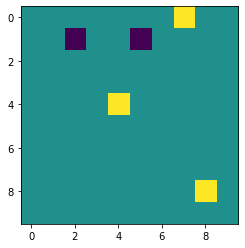

size
[array([[0., 0., 0., 0., 0., 0., 0., 3., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [2., 2., 0., 0., 0., 0., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 0., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 3., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 1., 1., 1.]]), array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 1., 0., 0., 0., 3., 3., 3.],
       [3., 3., 1., 1., 0., 3., 0., 0., 3., 3.],
       [3., 3., 1., 1., 0., 0., 0., 0., 3., 3.],
       [3., 3., 1., 1., 2., 2., 2., 2., 3., 3.],
       [3., 3., 1., 1., 2., 2., 2., 3., 3., 3.],
       [3., 3., 3., 1., 2., 2., 2., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]]), array([[0.

In [78]:
# Generates Random Map along with the given obstacle list
MaxIter = 80000
CCvariation = 0.01
randomLevel = 0.0001
dcells = 2
timeout = 10   # [seconds]

importance = False
notEqualPortions = False
visualization = False

h = 10
w = 10
center = (float((h-1)/2), float((w-1)/2))
maps_gen = []
seed_gen = []

for i in range(5):
    


    map = np.ones((h,w))
    radius = random_seed()
    circular, map_list, random_obstacles, obstacle_list = create_mask(h,w, center, radius)

    # Generates 3 list of initial poses. 
    initial_poses = seed_positions(3, obstacle_list, map)
    initial_positions = list(list_To_coords(initial_poses, h))
    portions = list(np.ones(len(initial_poses))*1/len(initial_poses))
    obstacles_positions = list(list_To_coords(obstacle_list, h))
    initial_positions = list(list_To_coords(initial_poses, h))
    #print(initial_poses)
    #print(initial_positions)

    #MatPlot Visualizer for generated Maps
    map = writespots(obstacle_list, np.ones((h,w)), 0)
    map = writespots(initial_poses, map, 2)
    #paint_map(map)

    from interruptingcow import timeout
    try:
        with timeout(5, exception=RuntimeError):
            while True:
                poly = darpinPoly.DARPinPoly(h, w, MaxIter, CCvariation, randomLevel, dcells, importance, notEqualPortions, initial_positions, portions, obstacles_positions, visualization)
                paint_map(map)
                maps_gen.append(poly.A)
                seed_gen.append(initial_positions)
                
                break
    except RuntimeError:
        pass


print("size")
print(maps_gen)

    #print(map)
    #timeout_start = time.time()



# f = open('varstor.txt', "wb")
# pickle.dump(maps_gen, f)
#pickle.dump(seed_gen, f)
#pickle.dump("abc", f)

# print(poly.A)


In [79]:
import pickle
data = [maps_gen, seed_gen]
pickle.dump( data, open( "save.p", "wb" ) )

data2 = pickle.load( open( "save.p", "rb" ) )
print(data2)

[[array([[0., 0., 0., 0., 0., 0., 0., 3., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [2., 2., 0., 0., 0., 0., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 0., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 3., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2., 2., 1., 1., 1.]]), array([[3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 1., 0., 0., 0., 3., 3., 3.],
       [3., 3., 1., 1., 0., 3., 0., 0., 3., 3.],
       [3., 3., 1., 1., 0., 0., 0., 0., 3., 3.],
       [3., 3., 1., 1., 2., 2., 2., 2., 3., 3.],
       [3., 3., 1., 1., 2., 2., 2., 3., 3., 3.],
       [3., 3., 3., 1., 2., 2., 2., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.],
       [3., 3., 3., 3., 3., 3., 3., 3., 3., 3.]]), array([[0., 0.